In [1]:
# Import Libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
path = r'/Users/cameronpaschall/Desktop/Instacart Basket Analysis'

In [3]:
# Import data set

df_opc = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'df_ords_prods_cust.pkl'))

## Step 2 Bars and Graphs

In [4]:
df_opc.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_time_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', '_merge', 'price_range_loc', 'Busiest days',
       'Slowest days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'spending', 'type_of_spender', 'order_freq', 'frequency_flag',
       'first_name', 'last_name', 'gender', 'state', 'age', 'date_joined',
       'n_dependants', 'fam_status', 'income', 'merge'],
      dtype='object')

Text(0.5, 1.0, 'Busiest Days')

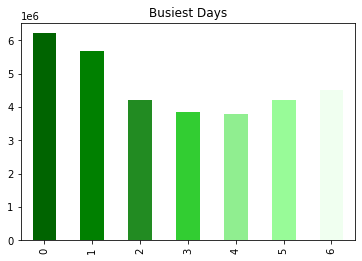

In [5]:
# Bar Chart

bar_opc = df_opc['orders_day_of_week'].value_counts().sort_index().plot.bar(color=['darkgreen', 'green', 'forestgreen', 'limegreen', 'lightgreen', 'palegreen', 'honeydew'])
plt.title('Busiest Days')

In [6]:
# Histogram

df_opc.loc[df_opc['prices'] >100, 'prices'] = np.nan

In [7]:
df_opc['prices'].max()

25.0

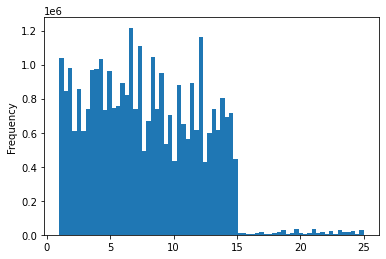

In [8]:
hist_opc = df_opc['prices'].plot.hist(bins = 70)

<AxesSubplot:xlabel='prices', ylabel='prices'>

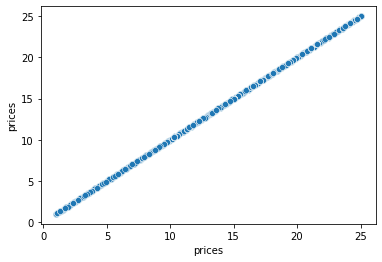

In [9]:
# Scatterplot

sns.scatterplot(x = 'prices', y = 'prices',data = df_opc)

In [10]:
# Line chart

df = df_opc[:2000000]

In [11]:
np.random.seed(4)

In [12]:
dev = np.random.rand(len(df_opc)) <= 0.7

In [13]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [14]:
np.random.rand(10)

array([0.79555729, 0.6652899 , 0.04000166, 0.90958442, 0.0493868 ,
       0.6829014 , 0.09612088, 0.92855965, 0.51356997, 0.69561069])

In [15]:
big = df_opc[dev]

In [16]:
small = df_opc[~dev]

In [17]:
# size check
len(df_opc)

32435059

In [18]:
# size check
len(big) + len(small)

32435059

In [19]:
df_2 = small[['orders_day_of_week','prices']]

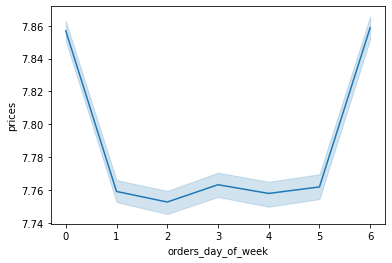

In [20]:
line_opc = sns.lineplot(data = df_2, x = 'orders_day_of_week',y = 'prices')

## Step 3 histogram for order hour of day

In [22]:
df_opc.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_time_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', '_merge', 'price_range_loc', 'Busiest days',
       'Slowest days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'spending', 'type_of_spender', 'order_freq', 'frequency_flag',
       'first_name', 'last_name', 'gender', 'state', 'age', 'date_joined',
       'n_dependants', 'fam_status', 'income', 'merge'],
      dtype='object')

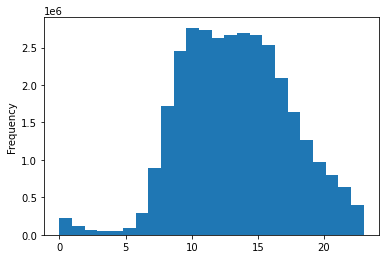

In [24]:
hist_hod_opc = df_opc['order_time_of_day'].plot.hist(bins = 24)

### The histogram shows that 9 am - 3 pm are the busiest hours of the day

## Step 4 Bar chart for loyalty flag

Text(0.5, 1.0, 'Loyalty Chart')

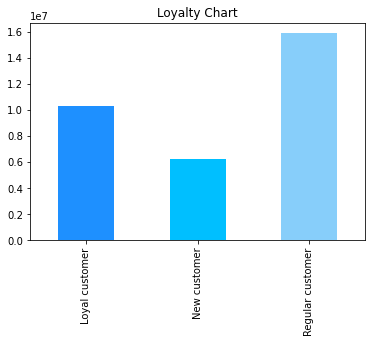

In [26]:
# Bar Chart for loyalty flag

bar_loy_opc = df_opc['loyalty_flag'].value_counts().sort_index().plot.bar(color=['dodgerblue', 'deepskyblue', 'lightskyblue'])
plt.title('Loyalty Chart')

In [36]:
## export bar

bar_loy_opc.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_loy_opc.png'))

## Step 5 difference in expenditure

In [27]:
np.random.seed(4)
dev = np.random.rand(len(df_opc)) <= 0.7

In [28]:
df_3 = small[['order_time_of_day','prices']]

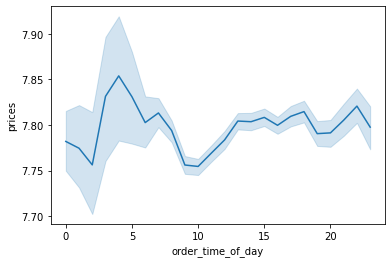

In [29]:
line_prices_hour_opc = sns.lineplot(data = df_3, x = 'order_time_of_day', y = 'prices')

In [35]:
## export line

line_prices_hour_opc.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_prices_hour_opc.png'))

## Step 6 Age and # of dependants

In [30]:
df_4 = small[['age','n_dependants']]

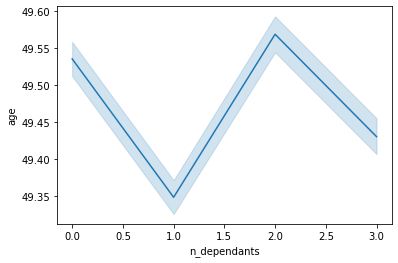

In [31]:
line_age_deps_opc = sns.lineplot(data = df_4, x = 'n_dependants', y = 'age')

According to the line chart, the younger people have 1 child and the older people have 2 children. There is really no correlation between age and number of children.

In [34]:
## export line

line_age_deps_opc.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_age_deps_opc.png'))

## Step 7 age and spending power

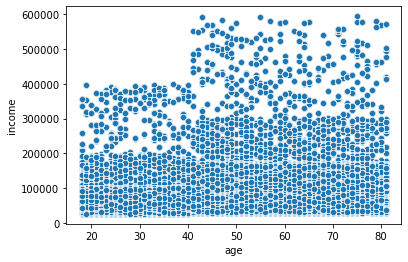

In [32]:
scatter_age_inc_opc = sns.scatterplot(x = 'age', y = 'income',data = df_opc)

The scatterplot shows that those aged 41+ have more income on average than those 40 or younger.

In [33]:
## export scatterplot

scatter_age_inc_opc.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatter_age_inc_opc.png'))